# Desafio EDO

O crescimento populacional de organismo tem muitas aplicações em engenharia e na ciência. Um dos modelos mais simples assume que a taxa de mudança da população $p$ é proporcional a população existente em qualquer tempo $t$:

$$\frac{dp}{dt} = k_g p$$

onde $k_g$ =  taxa de crescimento. A população mundial em milhões de 1950 a 2000 foi:

t|p
--|--
1950|2560
1955|2780
1960|3040
1965|3350
1970|3710
1975|4090
1980|4450
1985|4850
1990|5280
1995|5690
2000|6080

1. Utilize os dados de 1950 a 1970 para estimar $k_g$

2. Utilize o método de RK4 junto com a estimativa de $k_g$ para estimar a população de 1950 a 2050 com intervalo de 5 anos entre cada estimativa. Mostre os dados da simulação em um gráfico.

##Estimando $k_g$
<p align="justify">Sabe-se que a solução desta EDO é: $$P(t) = K e^{k_g t}$$.<qp>
<p align="justify">A partir disto é possível estimar $k_g$ pois os valores de $P(t)$ e $t$ são conhecidos. Dessa maneira tem-se para $K>0$ $$K = \frac {P(t)}{e^{k_g t}}$$</p>
<p align="justify"> De modo que: $$ln(K) = ln(P(t)) - ln(e^{k_g t})$$ $$ln(K) = ln(P(t)) - k_g t$$</p>
<p align="justify">Como K é uma constante, será o mesmo para qualquer valor da tabela. Para o cálculo, foram sempre adotados valores consecutivos de acordo com o mostrado na tabela: $$ln(P(t_0)) - k_g t_0=ln(P(t_1)) - k_g t_1$$ $$ln(P(t_1)) - ln(P(t_0))= k_g t_1 - k_g t_0$$ $$ln(P(t_1)) - ln(P(t_0))= k_g(t_1 - t_0)$$  </p>
<p align="justify"> A diferenca $t_1 - t_0$ sempre será igual a <b>5</b>. Portanto: $$ln(P(t_1)) - ln(P(t_0))= 5 k_g$$</p> 
<p>$$\frac {ln(P(t_1)) - ln(P(t_0))}{5}= k_g$$ </p>
<p> A partir das informações dadas na tabela, é possível calcular alguns valores para $k_g$ e então tomar a média aritmética como <b>valor estimado</b> para $k_g$.</p>
<p> No cálculo apresentado abaixo, foram utilizados os valores de $p$ dos anos de 1950 a 1970. Quanto mais valores forem utilizados para fazer a estimativa de $k_g$ mais preciso será a estimativa da população de cada ano. A variável "precisao_kg" controla qual período deve ser usado para estimar $k_g$.

In [87]:
import numpy as np
import matplotlib.pyplot as plt


#1. Estimativa de Kg.

t=np.array([1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000],dtype=float)
p=np.array([2560,2780,3040.0,3350.0,3710.0,4090.0,4450.0,4850.0,5280.0,5690.0,6080.0],dtype=float)
precisao_kg=6 #quanto menor, mais preciso sera kg. é o numero de anos excluidos do vetor t da direita pra esquerda. min:1,max:10 
kg=np.zeros(t.shape[0]-precisao_kg,dtype=float)
for i in range(t.shape[0]-precisao_kg): # precisao = 6 torna o período sendo de 1950 a 1970. 
  kg[i]=(np.log(p[i+1])-np.log(p[i]))/5.0 #calculo do kg realizado tomando os anos dois a dois: 1950,1955; 1955,1960; 1960,1965; ...
  print('kg[',i,'] = ',kg[i])

kg1=np.mean(kg) #determina-se a media dos kg's.
print('kg = ',kg1,sep='')

kg[ 0 ] =  0.01648873384221492
kg[ 1 ] =  0.017881317543116816
kg[ 2 ] =  0.019420566083768874
kg[ 3 ] =  0.020414306156473928
kg[ 4 ] =  0.019502618687073436
kg = 0.018741508462529595


##Estimando a população
<p align="justify">Para estimar a população entre os anos de 1950 a 2050 com intervalo de 5 anos foi utilizado o <b>método RK4</b>, tendo como base: $$P(1950)=2560$$ $$k_g = 0.018741508462529595$$</p>

P(1950) = 2560.0
P(1955) = 2811.490430679816
P(1960) = 3087.686891329757
P(1965) = 3391.0164640270004
P(1970) = 3724.1446636287574
P(1975) = 4089.998861038888
P(1980) = 4491.794007539915
P(1985) = 4933.06088624352
P(1990) = 5417.6771389197465
P(1995) = 5949.9013408537785
P(2000) = 6534.41042316383
P(2005) = 7176.3407714295145
P(2010) = 7881.333361785739
P(2015) = 8655.58333111648
P(2020) = 9505.894416947544
P(2025) = 10439.738745429964
P(2030) = 11465.322492802208
P(2035) = 12591.657997332602
P(2040) = 13828.642955427184
P(2045) = 15187.147397840383
P(2050) = 16679.10921029379


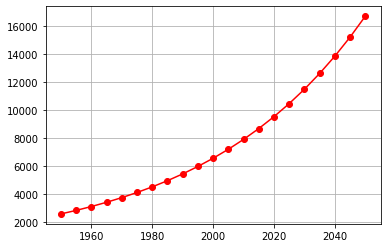

In [88]:
def k1(f,x,y):
  return f(x,y)

def k2(f,h,x,y,k1):
  return f(x+(h/2), y+(h*k1/2))

def k3(f,h,x,y,k2):
  return f(x+(h/2), y+(h*k2/2))

def k4(f,h,x,y,k3):
  return f(x+h, y+h*k3)

def rk4(f,h,x,y):
  k_1=k1(f,x,y)
  k_2=k2(f,h,x,y,k_1)
  k_3=k3(f,h,x,y,k_2)
  k_4=k4(f,h,x,y,k_3)
  return y+((h/6)*(k_1+2*k_2+2*k_3+k_4))

def g(x,y):
  return kg1*y

h2=5.0
valores_x=np.zeros(21,dtype=float); #serao 21 valores
valores_y=np.zeros(21,dtype=float);
valores_y[0]=2560.0; #valor inicial 
valores_x[0]=1950.0;

for i in range(valores_x.shape[0]-1):
  # print('kg1=',kg1)
  valores_x[i+1]=valores_x[i]+h2
  valores_y[i+1]=rk4(g,h2,i,valores_y[i])

x1=valores_x.astype(int) #transforma os valores de x para exibição
for q in range(valores_x.shape[0]):
  print('P(',x1[q],') = ',valores_y[q],sep='')

plt.plot(valores_x,valores_y,'ro-',markersize=6)
# plt.plot(valores_x,valores_y,'g-',linewidth=3)
plt.grid(1)
plt.show()